In [12]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns

# init variables
cell_counter = 0
joson_file_path = "imgs/gallery_parameters.json"
chapter_name = "Chapter 1"

@register_cell_magic
def cmagicXX(line, cell):
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array= line.split('--style')
    path = argument_array[0]
    path.replace(" ", "")
    style = str(*argument_array[1:])
    style=style.lstrip() # remove leading whitespace
    print(path)
    print(style)

@register_cell_magic
def capture_png(line, cell):
    global cell_counter
    cell_counter += 1
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )

    out_paths = line.strip().split(' ')
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            path = out_paths.pop(0)
            path = path.split(".png")[0] + str(time.time_ns()) + ".png"
            if not path:
                raise ValueError('Too few paths given!')
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')

        with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

        code = cell

        if cell_counter == 1:
            style = "border: 3px solid #34568B;"
        else:
            style = "border: 3px solid #98B4D4;"

        data[path[5:]] = [chapter_name, code, style]

        with open(joson_file_path, "w") as jsonFile:
            json.dump(data, jsonFile, indent=2)


def disp(x, sep='.0f', annot=False,  figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.axis("off")
    # Change range with: vmin=0, vmax=1
    sns.heatmap(x, annot=annot, fmt=sep, cmap="YlGnBu", cbar=False)

In [13]:
%%cmagicXX sdj askdfmn skmdfslkdm --style "ksjmf dslkmf"
i=2

sdj askdfmn skmdfslkdm 
"ksjmf dslkmf"


# 2D Arrays

1


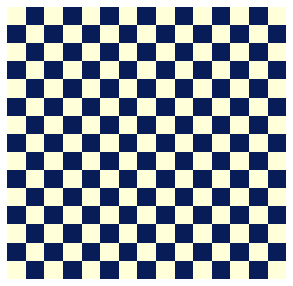

In [8]:
%%capture_png imgs/example.png
#Checkboard
pixX= 15
pixY= 15
array = [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
disp(array)
print(cell_counter)

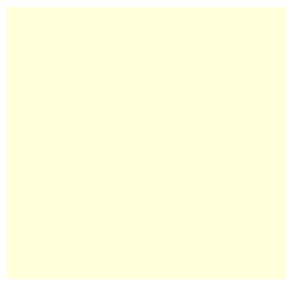

In [9]:
%%capture_png imgs/example.png 
#from 4 regions
array = np.ones((15,15))+30
disp(array)

In [13]:
cell_counter = 0